# **2.0.** Dimensionality Reduction Methods

<div style="text-align:justify">
Multivariate datasets are common in industrial environments, that hide many useful insights. Understanding the data is not trivial and visualising the data without a loss of information almost impossible. Today, different data dimensionality reduction methods are used to simplify data analysis and visualisation. Each of them features its own pro's and cons to be suitable for specific applications. <br>
The following dimensionality reduction methods will be tested and compared to identify the best fitting method for the given vacuum pump dataset.

- Principal Component Analysis PCA
- Non-Linear Matrix Factorization NMF
- Uniform Manifold Approximation and Projection UMAP

The perfomance of each method will be evaluated by calculating the following performance indicators:

- Mean Squared Error (MSE)
- R2 Score (R^2)
- Explained Variance Score (EV)

</div>

In [12]:
import pandas as pd
from sklearn.decomposition import PCA, NMF
import joblib

## 2.1. Testing Dimensionality Reduction 

<div style="text-align:justify">
The testing of the performance of the proposed methods above is conducted by a function, that searches for the best fitting amount of components for each method. The optimum amount of components is identified by finding the lowest inertia / highest variance with respect to reducing the amount of dimensions. Additionally, the MSE, R^2, and PCA variance results will be evaluated for each dimensionality reduction method and then compared. The R2 score is prefered over the Explained Variance score since, according to scikit-learns documentation, the Explained Variance score is similar to the R^2 score, with the notable difference that it does not account for systematic offsets in the prediction. Therefore, the R^2 score should be preferred.
from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html
<div>

In [13]:
# Import evaluate_dimRed class
from paper_example1 import PCA_example
run = 2
# Specify class of prescaled data
path = "scaled_df_"+str(run)+".csv"

# Initialise dimRed object from evaluate_dimRed class
dimRed = PCA_example(path)


    Current     Power  MotorSpeed      P_In     P_Out     T_Out        dP  \
0  0.604762  0.272727    0.375899  0.171723  0.484915  0.775218  0.001988   
1  0.604762  0.265909    0.375899  0.171723  0.484915  0.775218  0.001988   
2  0.604762  0.265909    0.375899  0.171723  0.484915  0.754736  0.001988   
3  0.604762  0.265909    0.348321  0.171723  0.484915  0.754736  0.001988   
4  0.604762  0.279545    0.348321  0.171723  0.484915  0.754736  0.001988   

    dE        dT  dCO2  Alert  Reopen count  PressureRange  RunningHours  \
0  0.0  0.005198   0.0    0.0           0.0            0.0           1.0   
1  0.0  0.015593   0.0    0.0           0.0            0.0           1.0   
2  0.0  0.010395   0.0    0.0           0.0            0.0           1.0   
3  0.0  0.015593   0.0    0.0           0.0            0.0           1.0   
4  0.0  0.005198   0.0    0.0           0.0            0.0           1.0   

   TotalEnergyConsumption  TotalCO2Impact  
0                     1.0           

In [15]:
# Execute evaluate_dimRed methods
dimRed.__dim_reduction__()

Iteration 0: 
Calculating metrics...
Iteration with: 2/6 Components


ValueError: y_true and y_pred have different number of output (6!=16)

In [ ]:
# Loading of needed data from previous notebooks
scaled_df = pd.read_csv(path)

In [ ]:
# Specify parameter combinations to further investigate
para_list = ["0","1","2","9","10"]
data_list = {}

for item in para_list:
    data_list[item] = dimRed.parameter_comb[item]

In [ ]:
# Save Model and print summarised variance per parameter combination 
for key in data_list:
    parameters = []
    parameters = data_list[key]
    print(parameters)
    data = scaled_df[parameters]
    k = 4
    err = 0.0001
    solver = "full"
    pca = PCA(n_components=k, tol=err, whiten=True, svd_solver=solver)
    pca = pca.fit(data)
    path = "C:/Users/a00546973/Desktop/MasterGENIUS/Models/pca_model_file_GHS2002_"+str(run)+"-"+str(key)+".pkl"
    joblib.dump(pca,path)

    pcs = pca.transform(data)
    label = pca.get_feature_names_out()
    print(label)
    pcs_df = pd.DataFrame(pca.components_,columns = data.columns, index=label)
    print(f"Explained Variance of Principal components {pca.explained_variance_ratio_}")
    print(f"Sum of Explained Variance of Principal components {pca.explained_variance_ratio_.sum().round(3)}")



['P_In', 'P_Out', 'T_Out', 'Current', 'MotorSpeed', 'Power']
['pca0' 'pca1' 'pca2' 'pca3']
Explained Variance of Principal components [0.82860607 0.09877422 0.04528317 0.01384591]
Sum of Explained Variance of Principal components 0.987
['P_In', 'P_Out', 'T_Out', 'Current', 'MotorSpeed', 'Power', 'RunningHours', 'TotalCO2Impact', 'TotalEnergyConsumption']
['pca0' 'pca1' 'pca2' 'pca3']
Explained Variance of Principal components [0.62198063 0.29881278 0.04130237 0.022571  ]
Sum of Explained Variance of Principal components 0.985
['P_In', 'P_Out', 'T_Out', 'Current', 'MotorSpeed', 'Power', 'dT', 'dE', 'dCO2']
['pca0' 'pca1' 'pca2' 'pca3']
Explained Variance of Principal components [0.80097264 0.0990442  0.04402414 0.02241395]
Sum of Explained Variance of Principal components 0.966
['P_In', 'P_Out', 'T_Out', 'Current', 'MotorSpeed', 'Power', 'dE', 'Alert', 'Reopen count', 'dP']
['pca0' 'pca1' 'pca2' 'pca3']
Explained Variance of Principal components [0.6850965  0.14655723 0.07598919 0.04526

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# load combined metrics data set
data = pd.read_excel("I2_dim_red_metrics_all.xlsx")

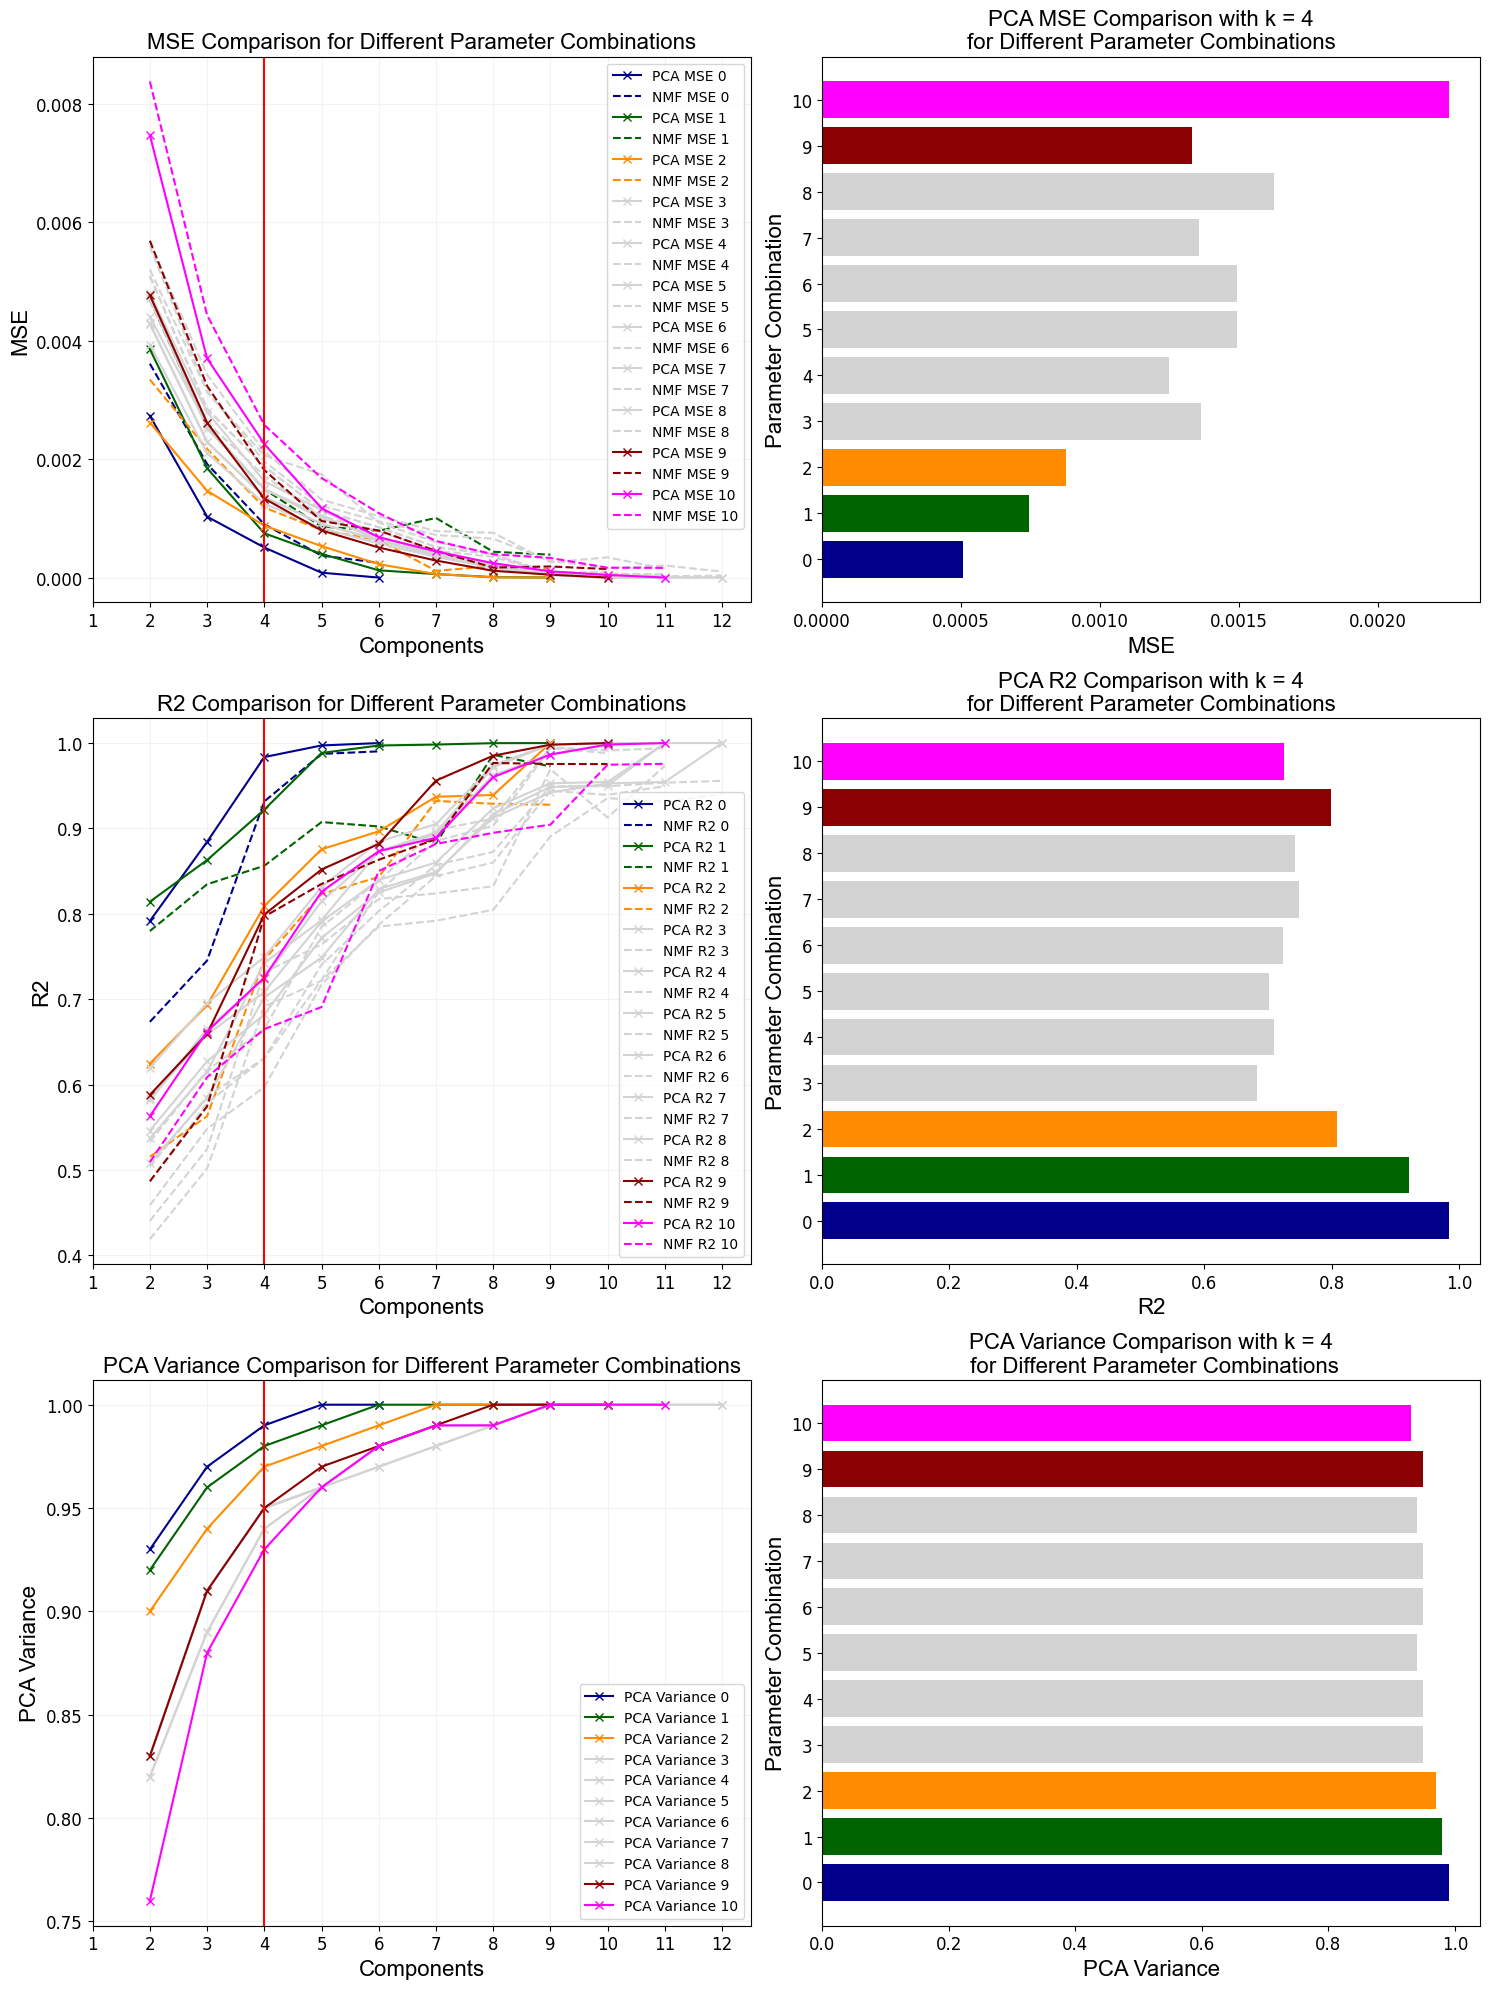

In [ ]:
# Plot comparable plot from dimRed results
iterations = data["Parameter\nCombination"].unique()
font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(3,2,figsize=(15,20))
# Define colors for plots
# Alternative: colors = ["darkblue","darkgreen","darkorange","lightgrey","lightsalmon","lightpink","lightgreen","violet","linen","darkred"]
colors=["darkblue","darkgreen","darkorange","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","darkred","magenta"]

# Plot metric graphs for each parameter combination
for i, iteration in enumerate(iterations):
    subset = data.loc[data["Parameter\nCombination"]==iteration]
    x1 = subset["Components"]
    # Plot MSE metrics
    y1 = subset["PCA MSE"]
    y2 = subset["NMF MSE"]
    ax[0,0].plot(x1,y1, label=f"PCA MSE {iteration}", color=colors[i % len(colors)], marker="x")
    ax[0,0].plot(x1,y2, label=f"NMF MSE {iteration}", linestyle="dashed", color=colors[i % len(colors)])
    # Plot R2 metrics
    y1 = subset["PCA R2"]
    y2 = subset["NMF R2"]
    ax[1,0].plot(x1,y1, label=f"PCA R2 {iteration}", color=colors[i % len(colors)],marker="x")
    ax[1,0].plot(x1,y2, label=f"NMF R2 {iteration}", linestyle="dashed", color=colors[i % len(colors)])
    # Plot PCA variance metrics
    y1 = subset["PCA Variance"]
    ax[2,0].plot(x1,y1, label=f"PCA Variance {iteration}", color=colors[i % len(colors)], marker="x")
    
# Plot horizontal barplot to emphasize results for 4 components     
subset_subset = data.loc[data["Components"]==4]
# Barplot for PCA MSE
x = subset_subset["PCA MSE"]
y = iterations
ax[0,1].barh(y,x, color=colors)

# Barplot for R2
x = subset_subset["PCA R2"]
y = iterations
ax[1,1].barh(y,x, color=colors)

# Barplot for PCA variance
x = subset_subset["PCA Variance"]
y = iterations
ax[2,1].barh(y,x, color=colors)

# Styling of plots    
ax[0,0].set_xlabel("Components", fontdict=font)
ax[0,0].set_ylabel("MSE", fontdict=font)
ax[0,0].set_xticks(range(1,max(data["Components"]+1),1))
ax[0,0].legend() 
ax[0,0].set_title("MSE Comparison for Different Parameter Combinations", fontdict=font)
ax[0,0].axvline(x=4, color='red', linestyle='-')

ax[1,0].set_xlabel("Components", fontdict=font)
ax[1,0].set_ylabel("R2", fontdict=font)
ax[1,0].set_xticks(range(1,max(data["Components"]+1),1))
ax[1,0].legend() 
ax[1,0].set_title("R2 Comparison for Different Parameter Combinations", fontdict=font)
ax[1,0].axvline(x=4, color='red', linestyle='-')

ax[2,0].set_xlabel("Components", fontdict=font)
ax[2,0].set_ylabel("PCA Variance", fontdict=font)
ax[2,0].set_xticks(range(1,max(data["Components"]+1),1))
ax[2,0].legend() 
ax[2,0].set_title("PCA Variance Comparison for Different Parameter Combinations", fontdict=font)
ax[2,0].axvline(x=4, color='red', linestyle='-')

ax[0,1].set_xlabel("MSE", fontdict=font)
ax[0,1].set_ylabel("Parameter Combination", fontdict=font)
ax[0,1].set_yticks(range(0,iteration+1,1))
ax[0,1].set_title("PCA MSE Comparison with k = 4\nfor Different Parameter Combinations", fontdict=font)

ax[1,1].set_xlabel("R2", fontdict=font)
ax[1,1].set_ylabel("Parameter Combination", fontdict=font)
ax[1,1].set_yticks(range(0,iteration+1,1))
ax[1,1].set_title("PCA R2 Comparison with k = 4\nfor Different Parameter Combinations", fontdict=font)

ax[2,1].set_xlabel("PCA Variance", fontdict=font)
ax[2,1].set_ylabel("Parameter Combination", fontdict=font)
ax[2,1].set_yticks(range(0,iteration+1,1))
ax[2,1].set_title("PCA Variance Comparison with k = 4\n for Different Parameter Combinations", fontdict=font)

ax[0,0].grid(color="0.95")
ax[1,0].grid(color="0.95")
ax[2,0].grid(color="0.95")
for i in range(3):
    for j in range(2):
        ax[i, j].tick_params(axis='x', labelsize=12)
        ax[i, j].tick_params(axis='y', labelsize=12)
    
plt.tight_layout()
plt.show()   
